# Eksempel: summering av tallserier

## Oppgave. Lag en funksjon som
- får inn et positivt heltall n
- returnerer summen av alle tall fra og med 1 til og med n, dvs. 1 + 2 + ... + n

Lag både en variant med while-løkke og en variant med for-løkke

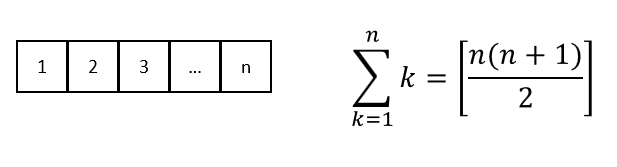

Hvordan tenke om løsning her?


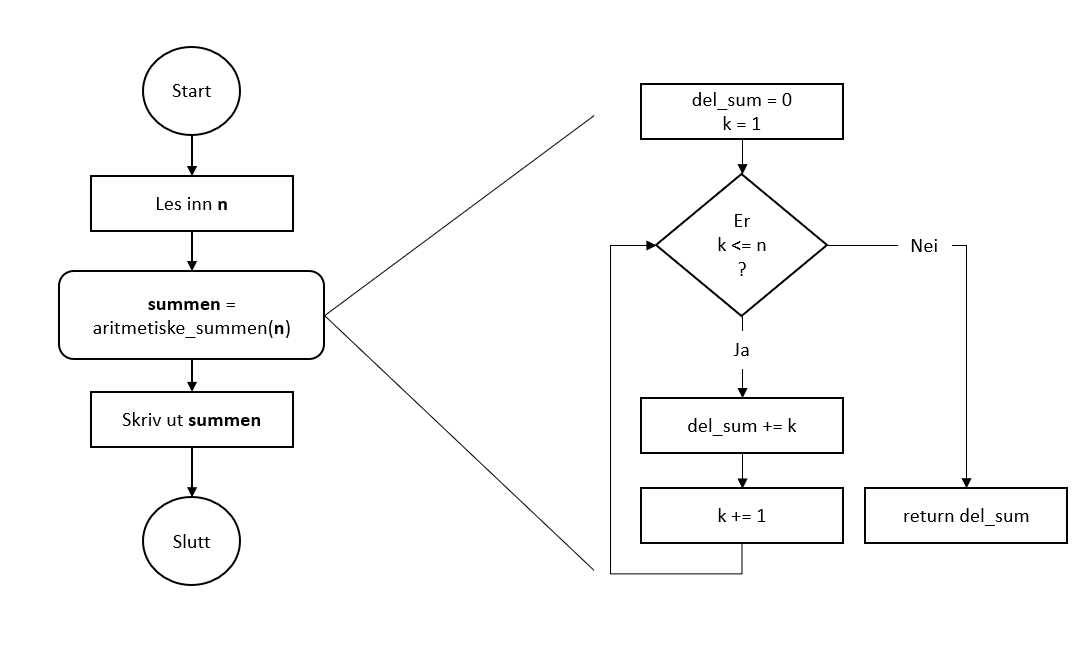

In [26]:
# Løsning 1 (gaus): sum = n*(n+1)/2
def aritmetiske_summen_1(n):
    '''Får inn et positivt heltall n
       Returnerer summen 1 + 2 + ... + n'''
    return n * (n + 1) // 2

In [27]:
# Test
n = 9
print(aritmetiske_summen_1(n))

45


In [28]:
# Løsning 2: while-løkke
def aritmetiske_summen_2(n):
    '''Får inn et positivt heltall n
       Returnerer summen 1 + 2 + ... + n'''
    del_sum = 0
    k = 1

    while k <= n:
        del_sum +=k # samme som del_sum = del_sum + k
        k +=1 # samme som k = k + 1
        
    return del_sum

In [29]:
print(aritmetiske_summen_2(n))

45


In [7]:
# Løsning 3: for-løkke
def aritmetiske_summen_3(n):
    '''Får inn et positivt heltall n
       Returnerer summen 1 + 2 + ... + n'''
    del_sum = 0

    for k in range(1,n+1):
        del_sum +=k
        
    return del_sum

In [8]:
print(aritmetiske_summen_3(n))

45


In [9]:
# Løsning 4: Bruk av standard sum-funksjon
def aritmetiske_summen_4(n):
    return sum(range(1,n+1))

In [10]:
print(aritmetiske_summen_4(n))

45


In [11]:
# Løsning 5: bruk av numpy! Obs! arange kan ta imot maks 2^16-1
import numpy as np

def aritmetiske_summen_5(n):
    return np.sum(np.arange(1,n+1))

In [12]:
print(aritmetiske_summen_5(n))

45


I koden nedenfor bruker vi time.perf_counter() for å måle tiden på utførelse av de ulike funksjonene

In [25]:
import time

n = 2**16 # et stort heltall

funcs = [aritmetiske_summen_1, aritmetiske_summen_2, aritmetiske_summen_3, aritmetiske_summen_4, aritmetiske_summen_5]
times = {} # time spent to execute each function (dictionary) (See https://www.w3schools.com/python/python_dictionaries.asp)

for func in funcs: # loop through all functions
    time_0 = time.perf_counter() # save the time before running the function (func)
    svar = func(n) # run function
    time_spent = time.perf_counter() - time_0 # calculate time spent
    times[func.__name__] = time_spent # save time spent and name of the function in a dictionary
    print(f'{func.__name__}: Svar = {svar}, tid = {time_spent:.10f}')

# Find the element in the dictionary with smallest time
func_name, min_time_spent = min(times.items())
print(f'{func_name} used the least amount of time: {min_time_spent:.10f}')

aritmetiske_summen_1: Svar = 2147516416, tid = 0.0000026000
aritmetiske_summen_2: Svar = 2147516416, tid = 0.0029401002
aritmetiske_summen_3: Svar = 2147516416, tid = 0.0024750002
aritmetiske_summen_4: Svar = 2147516416, tid = 0.0006927000
aritmetiske_summen_5: Svar = -2147450880, tid = 0.0000988999
aritmetiske_summen_1 used the least amount of time: 0.0000026000


Gauss-varianten raskest, og enda mye klarere enn sist. Hvorfor?
- grunnen er at den gjør kun en addisjon, en multiplikasjon og en heltallsdivisjon, uansett hvor stort tallet er
- alle de andre variantene gjør et økende antall addisjoner jo større tall
    - while-varianten og for-varianten har disse addisjonene direkte synlige i koden, en for hver runde av løkka
    - range- og arange-variantene har addisjonene skjult i sum() og np.sum()-funksjonene. 
        - De er mer effektive enn våre egne while- og for-løkker, men har likevel økende tidsbruk med økende tallstørrelse
- for numpy-varianten kan det dessuten merkes at den gir feil svar
    - numpy takler ikke lange heltall særlig godt hvis vi bare gjør beregningen rett fram som dette
    - numpy er primært ment for effektive beregninger med flyttall
    
Dette eksemplet illustrerer at et problem kan "se ut" som et typisk løkkeproblem
- f.eks. summer alle tallene fra og med 1 til og med n
- men det kan finnes bedre løsninger som __ikke__ bruker løkke
- her er løsning uten løkke mulig fordi vi har en regulær tallserie hvor alle opplysninger er kjent på forhånd